# Notebook 19: Small Sample Tests for Mean and Variance of Normal Populations
***

We'll need Numpy, Matplotlib, Pandas, and scipy.stats for this notebook, so let's load them. 

In [22]:
import numpy as np 
from scipy import stats
import pandas as pd
import matplotlib.pylab as plt 
%matplotlib inline

### Exercise 1 - The Sampling Distribution for the Variance of a Normal Population 
*** 

We saw some time ago that the sample mean of a normal population itself has a normal distribution.  In this exercise we'll explore the sampling distribution of the sample variance from a normal population.  

**Part A**: The following function draws many samples of size $n$ from $N(\mu, \sigma^2)$ and plots a histogram of the resulting sample means.  Run the code a few times and verify that the sampling distribution does appear normal, even for small sample sizes.  

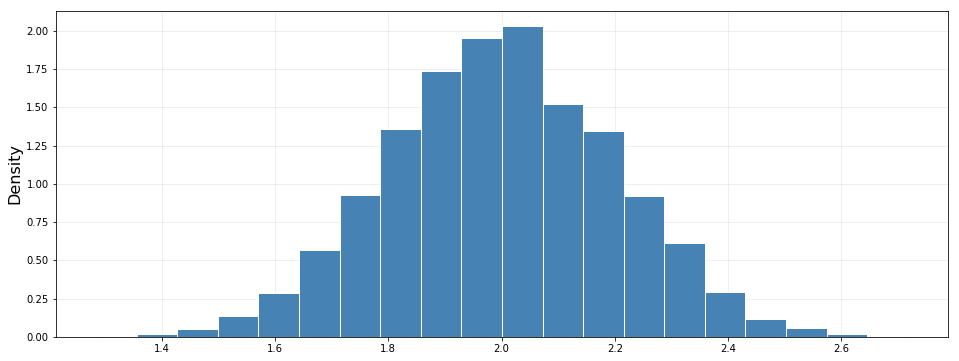

In [23]:
def sampling_dist(num_tests=5000, sample_size=10, mu=5, sig=2): 
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
    xbars = np.array([np.mean(stats.norm.rvs(mu, sig, size=sample_size)) for ii in range(num_tests)])
    pd.Series(xbars).hist(ax=ax, color="steelblue", edgecolor="white", bins=20, density=True)
    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)
    ax.set_ylabel("Density", fontsize=16)
    
sampling_dist(num_tests=5000, sample_size=100, mu=2, sig=2)

**Part B**: Modify the code above so that it plots a histogram of the **sample variance** of samples from $N(\mu,\sigma^2)$.  Experiment with the parameters $\mu$, $\sigma$, and _in-particular_ the sample size (starting with values of $n \approx 5$). Describe the resulting distributions. 

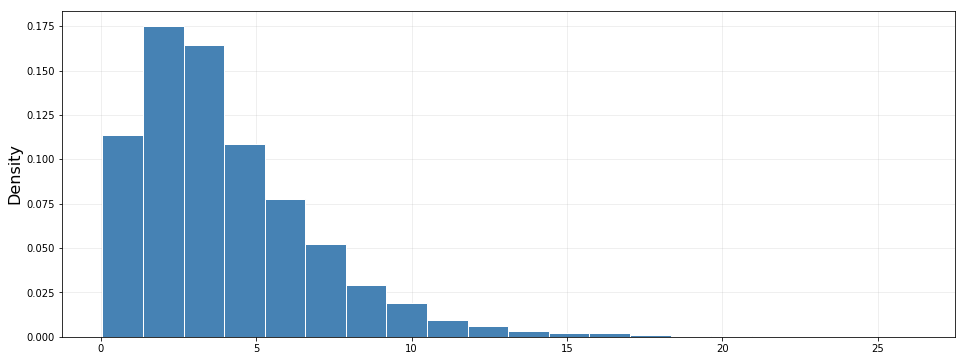

In [33]:
def sampling_dist(num_tests=5000, sample_size=5, mu=5, sig=2): 
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
    variances = np.array([np.var(stats.norm.rvs(mu, sig, size=sample_size), ddof = 1) for ii in range(num_tests)])
    pd.Series(variances).hist(ax=ax, color="steelblue", edgecolor="white", bins=20, density=True)
    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)
    ax.set_ylabel("Density", fontsize=16)
    
sampling_dist(num_tests=5000, sample_size=5, mu=2, sig=2)

**Part C**: Modify the code above so that it simulates $(n-1)S^2/\sigma^2$, creates the histogram, and then overlays the associated density function of the proper $\chi^2_\nu$ distribution (obtained from scipy.stats.chi2). 

**Hint**: If you're using np.var to compute the sample variance, know that it takes an optional argument ddof that determines the denominator that divides the sum of squared deviations.  Passing in ddof=1 will give the traditional sample variance. 

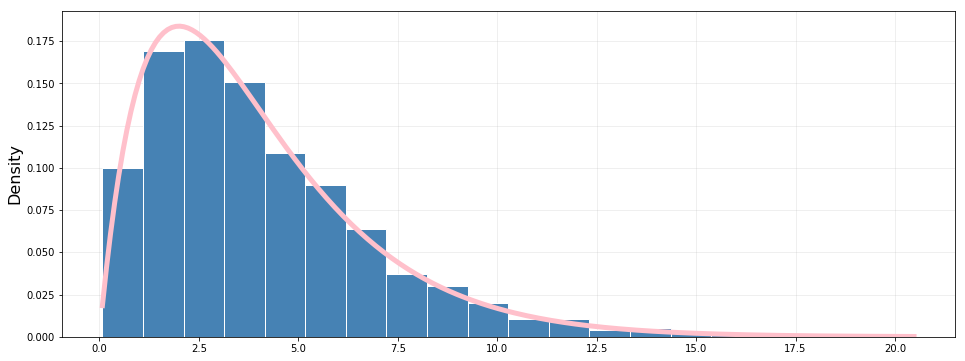

In [52]:
def sampling_dist(num_tests=5000, sample_size=5, mu=5, sig=2): 
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
    chi22 = np.array([(sample_size-1)*np.var(stats.norm.rvs(mu, sig, size=sample_size), ddof = 1)/(sig**2) for ii in range(num_tests)])
    pd.Series(chi22).hist(ax=ax, color="steelblue", edgecolor="white", bins=20, density=True)
    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)
    ax.set_ylabel("Density", fontsize=16)
    
    xplot = np.linspace(np.min(chi22),np.max(chi22),200)
    pdf = stats.chi2.pdf(xplot, sample_size-1)

    ax.plot(xplot, pdf, color = 'pink', lw = 5)
    
sampling_dist(num_tests=5000, sample_size=5, mu=2, sig=2)

### Exercise 2 - Small Sample vs Bootstrapped Confidence Intervals 
*** 

In this exercise you will compare the confidence intervals achieved using the small-sample techniques discussed in class and empirical bootstrapped confidence intervals. For all tests we will use a random sample of size $n=10$ from the normal population distribution with parameters $\mu=5$ and $\sigma=2$.  

In [54]:
mu, sig, n, alpha = 5, 2, 10, 0.05
x = stats.norm.rvs(mu,sig, size = n)

**Part A**: Compute a 95% t-confidence interval for the population mean based on the sample mean.  

In [ ]:
xbar = np.mean(x)
t = stats.t.ppf(1-alpha/2)

sample_s

**Part B**: Computed an empirical bootstrapped 95% confidence interval for the population mean using the same sample used in **Part A**.  How do the confidence intervals compare?  Do they both cover the true mean of $\mu=5$?  Are they approximately the same width? 

**Part C**: Compute a 95% confidence interval for the population variance based on the $\chi^2$ distribution using the same sample used in **Part A**. 

**Part D**: Computed an empirical bootstrapped 95% confidence interval for the population variance using the same sample as in **Part A**.  How do the confidence intervals compare?  Do they both cover the true variance of $\sigma^2=4$?  Are they approximately the same width? 